In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

from bitcoin import engine
df = engine.load_data('BTC-EUR')
df.head()

,time,low,high,open,close,volume,tw_sentiment,tw_followers,reddit_sentiment,google_sentiment
0,1520272320,9322.00,9322.01,9322.01,9322.00,0.273876,0.104927,1063075.0,0.034975,0.170432
1,1520272380,9322.00,9322.01,9322.01,9322.00,0.145773,0.104928,1063083.0,0.034975,0.170432
2,1520272440,9320.00,9320.01,9320.00,9320.00,0.066710,0.104928,1063089.0,0.034975,0.170432
3,1520272500,9320.01,9320.01,9320.01,9320.01,0.013989,0.104928,1063091.0,0.034975,0.170432
4,1520272560,9320.01,9320.01,9320.01,9320.01,0.706339,0.104928,1063095.0,0.038833,0.170432


In [2]:
df.describe()

,time,low,high,open,close,volume,tw_sentiment,tw_followers,reddit_sentiment,google_sentiment
count,1.559000e+03,1559.000000,1559.000000,1559.000000,1559.000000,1559.000000,1559.000000,1.559000e+03,1559.000000,1559.000000
mean,1.520319e+09,9073.678210,9077.202656,9075.663502,9075.469230,1.302238,0.060218,8.751013e+05,0.057852,0.106244
std,2.715673e+04,235.435586,233.176584,234.192841,234.152742,3.632145,0.028853,2.724078e+05,0.031221,0.040649
min,1.520272e+09,8545.000000,8552.010000,8552.010000,8549.510000,0.001000,-0.015150,3.329640e+05,-0.002483,0.025257
25%,1.520296e+09,8838.585000,8849.970000,8841.885000,8844.890000,0.119833,0.045485,6.394830e+05,0.032393,0.075896
50%,1.520319e+09,9136.400000,9139.330000,9139.320000,9137.500000,0.370873,0.063590,8.381300e+05,0.061548,0.113540
75%,1.520343e+09,9215.755000,9217.660000,9217.500000,9217.500000,1.204968,0.082695,1.121288e+06,0.086548,0.134075
max,1.520366e+09,9399.000000,9399.000000,9399.000000,9399.000000,90.488639,0.118355,1.365095e+06,0.102910,0.174146


In [3]:
df.corr()

,time,low,high,open,close,volume,tw_sentiment,tw_followers,reddit_sentiment,google_sentiment
time,1.000000,-0.927545,-0.928162,-0.928006,-0.927947,0.187279,-0.446803,-0.864768,-0.606953,-0.222733
low,-0.927545,1.000000,0.999309,0.999501,0.999715,-0.218283,0.383487,0.759783,0.640378,0.110590
high,-0.928162,0.999309,1.000000,0.999766,0.999683,-0.193822,0.383583,0.762262,0.641769,0.112556
open,-0.928006,0.999501,0.999766,1.000000,0.999489,-0.197788,0.383007,0.761356,0.641535,0.111763
close,-0.927947,0.999715,0.999683,0.999489,1.000000,-0.206001,0.384173,0.761138,0.641183,0.111849
volume,0.187279,-0.218283,-0.193822,-0.197788,-0.206001,1.000000,-0.000898,-0.163896,-0.089847,-0.009048
tw_sentiment,-0.446803,0.383487,0.383583,0.383007,0.384173,-0.000898,1.000000,0.216781,0.229172,0.249610
tw_followers,-0.864768,0.759783,0.762262,0.761356,0.761138,-0.163896,0.216781,1.000000,0.686439,0.080279
reddit_sentiment,-0.606953,0.640378,0.641769,0.641535,0.641183,-0.089847,0.229172,0.686439,1.000000,-0.418165
google_sentiment,-0.222733,0.110590,0.112556,0.111763,0.111849,-0.009048,0.249610,0.080279,-0.418165,1.000000


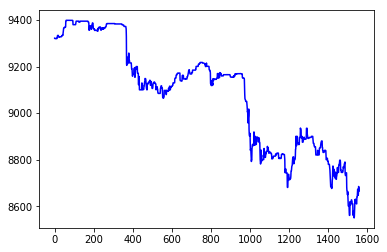

In [4]:
plt.plot(df['close'], 'b')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x106345a20>]],
      dtype=object)

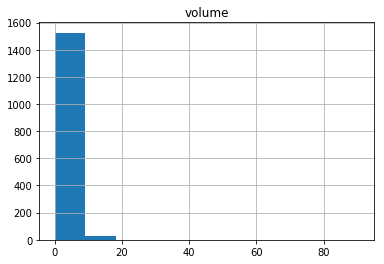

In [5]:
df.hist(column='volume')

In [6]:
X_train, X_test, y_train, y_test, scaler_x, scaler_y = engine.prepare(df)

In [7]:
model, history = engine.train(X_train, X_test, y_train, y_test)

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 1, 200)            164800    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 200)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 1, 200)            320800    
_________________________________________________________________
dropout_2 (Dropout)          (None, 1, 200)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 200)               320800    
_________________________________________________________________
dropout_3 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 201       
__________

([<matplotlib.lines.Line2D at 0x11f0efac8>], 'g')

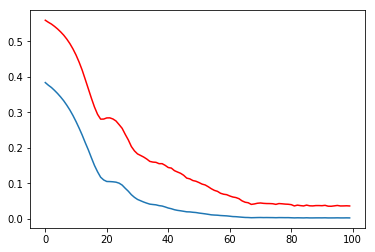

In [8]:
plt.plot(history.history['mean_absolute_error'], 'r')
plt.plot(history.history['mean_squared_error']), 'g'

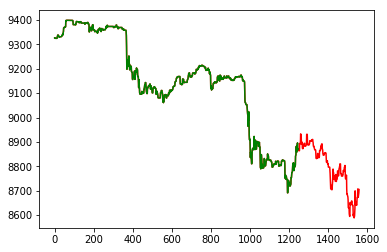

In [9]:
import numpy as np

X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

y_predict_train = model.predict(X_train)
y_predict_train = scaler_y.inverse_transform(y_predict_train)

y_predict_test = model.predict(X_test)
y_predict_test = scaler_y.inverse_transform(y_predict_test)

X = np.concatenate((X_train, X_test), axis=0)
y = np.concatenate((y_predict_train, y_predict_test), axis=0)

plt.plot(y, 'r')
plt.plot(y_predict_train, 'g')

In [10]:
engine.test_order_percent(df, model, scaler_x, scaler_y)

Error Order percentage: 21.54%


0.9567554008940089

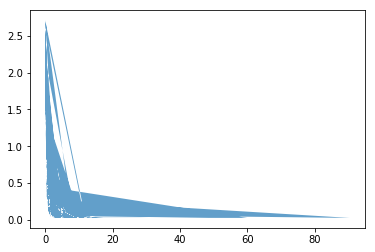

In [11]:
from sklearn.neighbors import KernelDensity
import numpy as np

X = df['volume'].values.reshape(-1, 1)

kde = KernelDensity(kernel='gaussian', bandwidth=0.01).fit(X)
log_dens = kde.score_samples(X)
plt.fill(X, np.exp(log_dens), alpha=0.7)

kde.score(0.01)